In [16]:
import pandas as pd
import matplotlib.pyplot as plt

In [17]:
dataset=pd.read_csv('creditcard.csv.zip')

Text(0, 0.5, 'frequency')

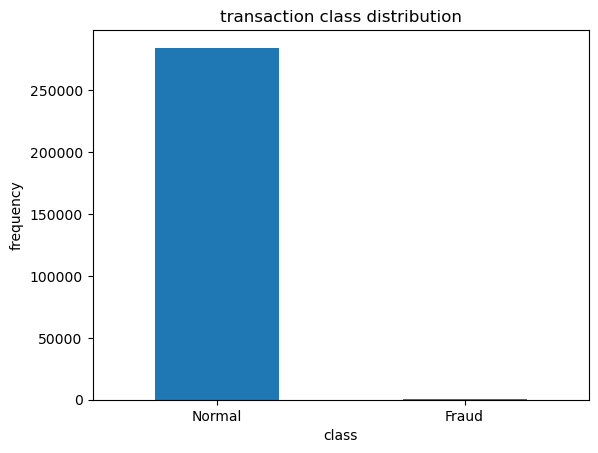

In [18]:
fraud=dataset[dataset['Class']==1]
normal=dataset[dataset['Class']==0]
count_classes=pd.Series(dataset['Class']).value_counts(sort=True)
count_classes.plot(kind='bar',rot=0)
plt.title("transaction class distribution")
LABELS=["Normal","Fraud"]
plt.xticks(range(2),LABELS)
plt.xlabel("class")
plt.ylabel("frequency")

In [19]:
#preprocess and splitting the dataset
from sklearn.model_selection import train_test_split

In [20]:
x=dataset.iloc[:,[1,29]].values
y=dataset.iloc[:,30].values
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.25,random_state=1)

In [21]:
#logestic regression model
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
from sklearn.metrics import precision_score, recall_score, f1_score, classification_report

confusion matrix for normal logistic regression
[[71083     8]
 [  108     3]]
auc for normal logistic regression: 0.700


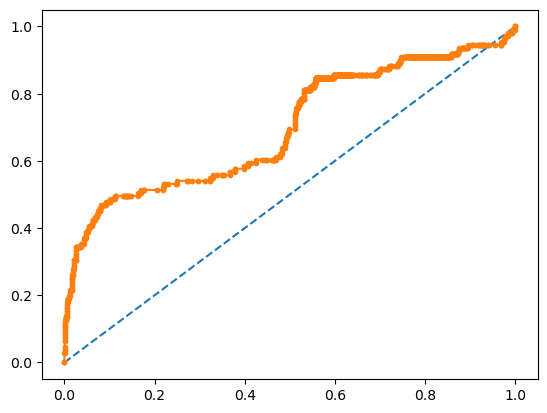

Precision: 0.2727
Recall: 0.0270
F1-Score: 0.0492

Classification Report:

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     71091
           1       0.27      0.03      0.05       111

    accuracy                           1.00     71202
   macro avg       0.64      0.51      0.52     71202
weighted avg       1.00      1.00      1.00     71202



In [27]:
classifier=LogisticRegression(random_state=0)
classifier.fit(x_train,y_train)
y_pred1=classifier.predict(x_test)
cm1=confusion_matrix(y_test,y_pred1)
print("confusion matrix for normal logistic regression")
print(cm1)
probs=classifier.predict_proba(x_test)
probs=probs[:,1]
auc1=roc_auc_score(y_test,probs)
print('auc for normal logistic regression: %.3f'% auc1)
fpr,tpr,threshholds=roc_curve(y_test,probs)
plt.plot([0,1],[0,1],linestyle='--')
plt.plot(fpr,tpr,marker='.')
plt.show()
precision = precision_score(y_test, y_pred1)
recall = recall_score(y_test, y_pred1)
f1 = f1_score(y_test, y_pred1)
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1-Score: {f1:.4f}")
print("\nClassification Report:\n")
print(classification_report(y_test, y_pred1))


In [29]:
#KNN MODEL
from sklearn.neighbors import KNeighborsClassifier

confusion matrix for normal KNN
[[71084     7]
 [  106     5]]
auc for normal KNN: 0.605


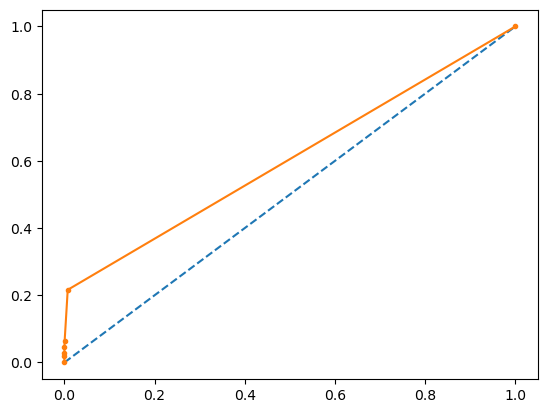

Precision: 0.4167
Recall: 0.0450
F1-Score: 0.0813

Classification Report:

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     71091
           1       0.42      0.05      0.08       111

    accuracy                           1.00     71202
   macro avg       0.71      0.52      0.54     71202
weighted avg       1.00      1.00      1.00     71202



In [35]:
classifier=KNeighborsClassifier(n_neighbors=5,metric='minkowski',p=2)
classifier.fit(x_train,y_train)
y_pred2=classifier.predict(x_test)
cm2=confusion_matrix(y_test,y_pred2)
print("confusion matrix for normal KNN")
print(cm2)
probs=classifier.predict_proba(x_test)
probs=probs[:,1]
auc2=roc_auc_score(y_test,probs)
print('auc for normal KNN: %.3f'% auc2)
fpr,tpr,threshholds=roc_curve(y_test,probs)
plt.plot([0,1],[0,1],linestyle='--')
plt.plot(fpr,tpr,marker='.')
plt.show()
precision = precision_score(y_test, y_pred2)
recall = recall_score(y_test, y_pred2)
f1 = f1_score(y_test, y_pred2)
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1-Score: {f1:.4f}")
print("\nClassification Report:\n")
print(classification_report(y_test, y_pred2))


In [31]:
#decision tree model
from sklearn.tree import DecisionTreeClassifier

confusion matrix for normal Decision Tree
[[71091     0]
 [  111     0]]
auc for normal Decision Tree: 0.798


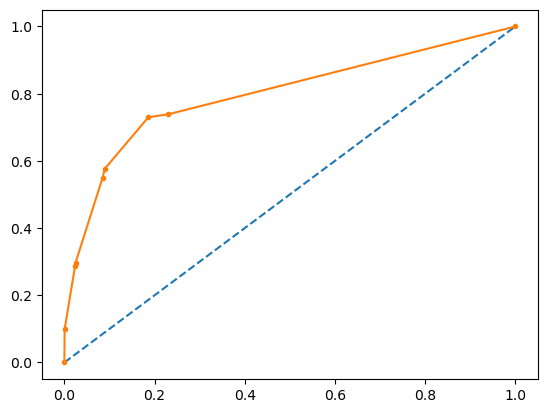

Precision: 0.0000
Recall: 0.0000
F1-Score: 0.0000

Classification Report:

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     71091
           1       0.00      0.00      0.00       111

    accuracy                           1.00     71202
   macro avg       0.50      0.50      0.50     71202
weighted avg       1.00      1.00      1.00     71202



C:\ProgramData\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\ProgramData\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\ProgramData\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\ProgramData\anaconda3\lib\site-packages\sklearn\metrics\_classification.p

In [36]:
classifier= DecisionTreeClassifier(criterion='entropy', max_depth=3,min_samples_leaf=6,random_state=0)
classifier.fit(x_train,y_train)
y_pred3=classifier.predict(x_test)
cm3=confusion_matrix(y_test,y_pred3)
print("confusion matrix for normal Decision Tree")
print(cm3)
probs=classifier.predict_proba(x_test)
probs=probs[:,1]
auc3=roc_auc_score(y_test,probs)
print('auc for normal Decision Tree: %.3f'% auc3)
fpr,tpr,threshholds=roc_curve(y_test,probs)
plt.plot([0,1],[0,1],linestyle='--')
plt.plot(fpr,tpr,marker='.')
plt.show()
precision = precision_score(y_test, y_pred3)
recall = recall_score(y_test, y_pred3)
f1 = f1_score(y_test, y_pred3)
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1-Score: {f1:.4f}")
print("\nClassification Report:\n")
print(classification_report(y_test, y_pred3))

In [33]:
#random forest model
from sklearn.ensemble import RandomForestClassifier

confusion matrix for normal Random Forest
[[71056    35]
 [  102     9]]
auc for normal Random Forest: 0.620


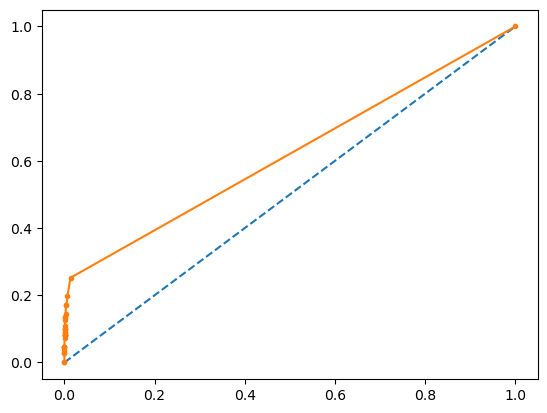

Precision: 0.2045
Recall: 0.0811
F1-Score: 0.1161

Classification Report:

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     71091
           1       0.20      0.08      0.12       111

    accuracy                           1.00     71202
   macro avg       0.60      0.54      0.56     71202
weighted avg       1.00      1.00      1.00     71202



In [37]:
classifier=RandomForestClassifier(n_estimators=30, oob_score=True, random_state=0)
classifier.fit(x_train,y_train)
y_pred4=classifier.predict(x_test)
cm4=confusion_matrix(y_test,y_pred4)
print("confusion matrix for normal Random Forest")
print(cm4)
probs=classifier.predict_proba(x_test)
probs=probs[:,1]
auc4=roc_auc_score(y_test,probs)
print('auc for normal Random Forest: %.3f'% auc4)
fpr,tpr,threshholds=roc_curve(y_test,probs)
plt.plot([0,1],[0,1],linestyle='--')
plt.plot(fpr,tpr,marker='.')
plt.show()
precision = precision_score(y_test, y_pred4)
recall = recall_score(y_test, y_pred4)
f1 = f1_score(y_test, y_pred4)
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1-Score: {f1:.4f}")
print("\nClassification Report:\n")
print(classification_report(y_test, y_pred4))